In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from slam.motion_models.odometry_model import odometry_sample, odometry_command
from slam.utils import normalize_angle, sample_normal_distribution
from slam.particle_filter import ParticleFilter, low_variance_resampling

1000
1000


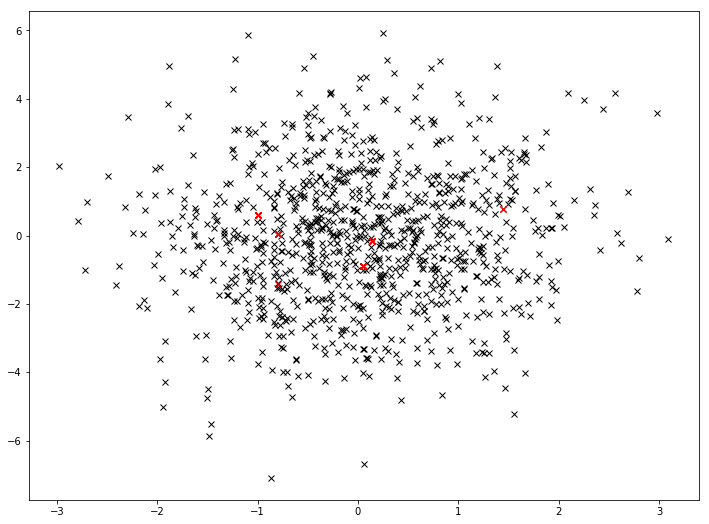

In [13]:
pf = ParticleFilter(np.matrix([0, 0, 0]).T, 1000, odometry_sample, \
                    sample_normal_distribution, low_variance_resampling)

for i, particle in enumerate(pf.particles):
    weight, pose = particle
    new_pose = np.matrix(np.random.normal([0, 0], [1, 2])).T
    pf.particles[i] = (weight, new_pose)
    
sigma = np.eye(2) * 0.2
for i, particle in enumerate(pf.particles):
    weight, pose = particle
    weight = math.exp(-1/2 * pose.T * np.linalg.pinv(sigma) * pose)
    pf.particles[i] = (weight, pose)

px = [particle[1].item(0) for particle in pf.particles]
py = [particle[1].item(1) for particle in pf.particles]

pf.resample()

rpx = [particle[1].item(0) for particle in pf.particles]
rpy = [particle[1].item(1) for particle in pf.particles]

plt.figure(figsize=(12, 9))
plt.plot(px, py, 'kx')
plt.plot(rpx, rpy, 'rx')